# Load data model

Il primo dataset che provo ad aprire viene dal *NCAR - The Climate Data Gateway*. Sono dati di una simulazione di modelli climatico, in particolari riferiti alla variabile U850 (un tipo di vento) per uno specifico arco temporale.

In [112]:
import netCDF4 as nc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime
# per fare i grafici geografici
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
datapath = './data.nosync/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.19200101-20051231.nc'
dataset = nc.Dataset(datapath)

In [3]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    source: CAM
    case: b.e11.B20TRC5CNBDRD.f09_g16.002
    title: UNSET
    logname: mai
    host: ys1329
    Version: $Name$
    revision_Id: $Id$
    initial_file: b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file: /glade/p/cesm/cseg//inputdata/atm/cam/topo/USGS-gtopo30_0.9x1.25_remap_c051027.nc
    history: Fri Sep  6 20:33:36 2013: /glade/apps/opt/nco/4.3.4/gnu/nco-4.3.4/bin/ncks -4 -L 1 CAT.b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.19200101-20051231.nc b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.19200101-20051231.nc
Fri Sep  6 12:10:46 2013: /glade/apps/opt/nco/4.3.4/gnu/nco-4.3.4/bin/ncrcat -O b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.1920.nc b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.1921.nc b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.1922.nc b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U850.1923.nc b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h1.U85

In [4]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 31390
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 192
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'chars', size = 8
<class 'netCDF4._netCDF4.Dimension'>: name = 'ilev', size = 31
<class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 30
<class 'netCDF4._netCDF4.Dimension'>: name = 'slat', size = 191
<class 'netCDF4._netCDF4.Dimension'>: name = 'slon', size = 288
<class 'netCDF4._netCDF4.Dimension'>: name = 'nbnd', size = 2


Qua faccio una semplice heatmap

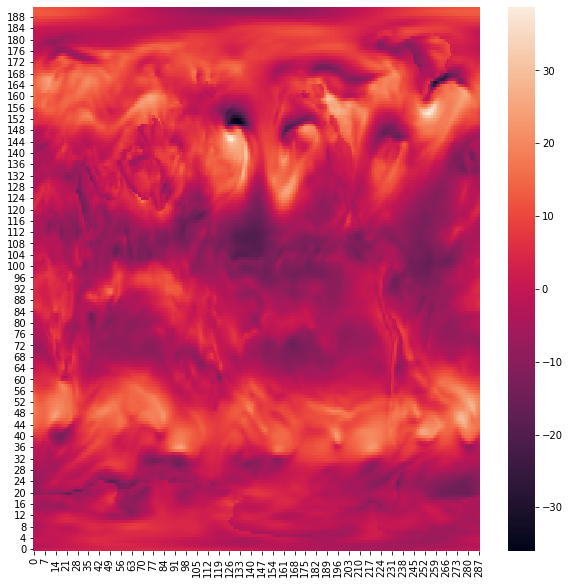

In [32]:
plt.figure(figsize = (10,10))
fig = sns.heatmap(dataset['U850'][0])
fig.invert_yaxis()

In [24]:
U850_period_interest = dataset['U850'][(dataset['date'][:] > 20041231)
                                       & (dataset['date'][:] < 20060101)]

In [31]:
np.save("./data.nosync/model_U850_2005", np.array(U850_period_interest))

Provo ora invece a prendere in considerazione le posizioni geografiche

In [109]:
dataset['U850'][20].shape

(192, 288)

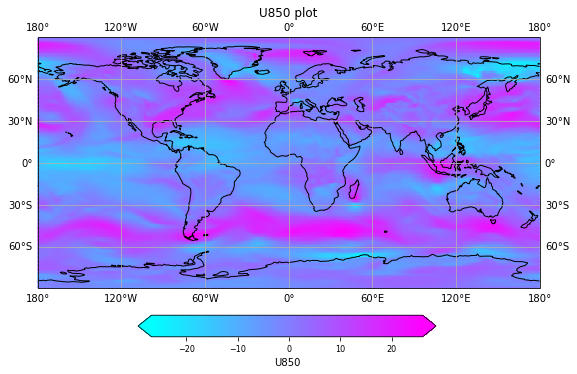

In [105]:
# We already tried pcolormesh (Module 1)

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("U850 plot")
ax.set_global()
mm = ax.pcolormesh(dataset['lon'][:], dataset['lat'][:], dataset['U850'][20], transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('U850')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

Faccio la stessa cosa, ma dove provo a fare io la divisione in lat e lon.

In [93]:
LAT = np.append((np.arange(-90, 90, 180/191)), 90)

In [103]:
LON = np.arange(0, 360, 360/288)

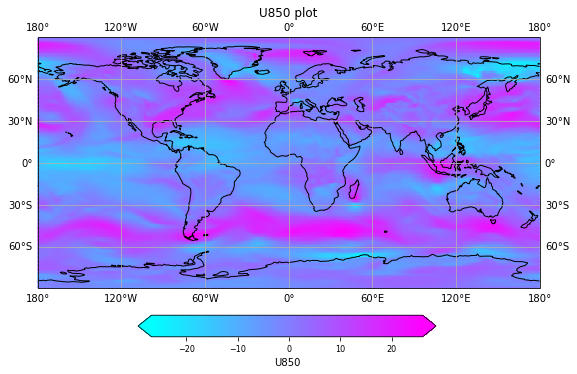

In [104]:
# We already tried pcolormesh (Module 1)

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("U850 plot")
ax.set_global()
mm = ax.pcolormesh(LON, LAT, dataset['U850'][20], transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('U850')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()